## Publications of the Hugo Steinhaus Center

In [ ]:
### required libraries

import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt
import re

First of all we have to scrap the data from http://prac.im.pwr.wroc.pl/~hugo/HSC/hsc.html website. 

In [101]:
website = 'http://prac.im.pwr.wroc.pl/~hugo/HSC/Publications.html' #html of website
result = requests.get(website)
soup = BeautifulSoup(result.content,"lxml")   # getting html

In [102]:
### Scrap only members of HCS from Research papers
Authors = []
for element in soup.findAll('ol')[2:28]:   #[2:28] because we want only 'ol' from research papers
    elements = element.findAll('li')
    for li in elements:   
        Paper = []
        for author in li.findAll('b'):  # 'b' because we want members of HCS only
            Paper.append(author.text)
        Authors.append(Paper)
        


In [112]:
### Change into polish sign
def Change(Name):
    if Name == 'A.Wylomanska':
        return 'A.Wyłomańska' 
    elif Name == 'A.Stanislawsky':
        return 'A.Stanislavsky'
    elif Name == 'T.Zórawik':
        return'T.Żórawik'
    elif Name == 'H.Loch':
        return 'H.Loch-Olszewska'
    elif Name == 'S.Orzel':
        return 'S.Orzeł'
    elif Name == 'G.Zak':
        return 'G.Żak'
    elif Name == 'J.Nowicka':
        return 'J.Nowicka-Zagrajek'
    else:
        Name = re.sub('\s+', '', Name)
        return Name
    
for i in range(len(Authors)):
    for j in range(len(Authors[i])):
        Authors[i][j] = Change(Authors[i][j])


Here is the main part of the assignment. Firstly I create dictionary which contains number of publications for every HCS members. Size of node in graph depends on the number of publications. 

Then I create the graph based on connections in Author list.
Weights of the edge between members is the number of common publications.
Size of node in graph depends on the number of publications. 

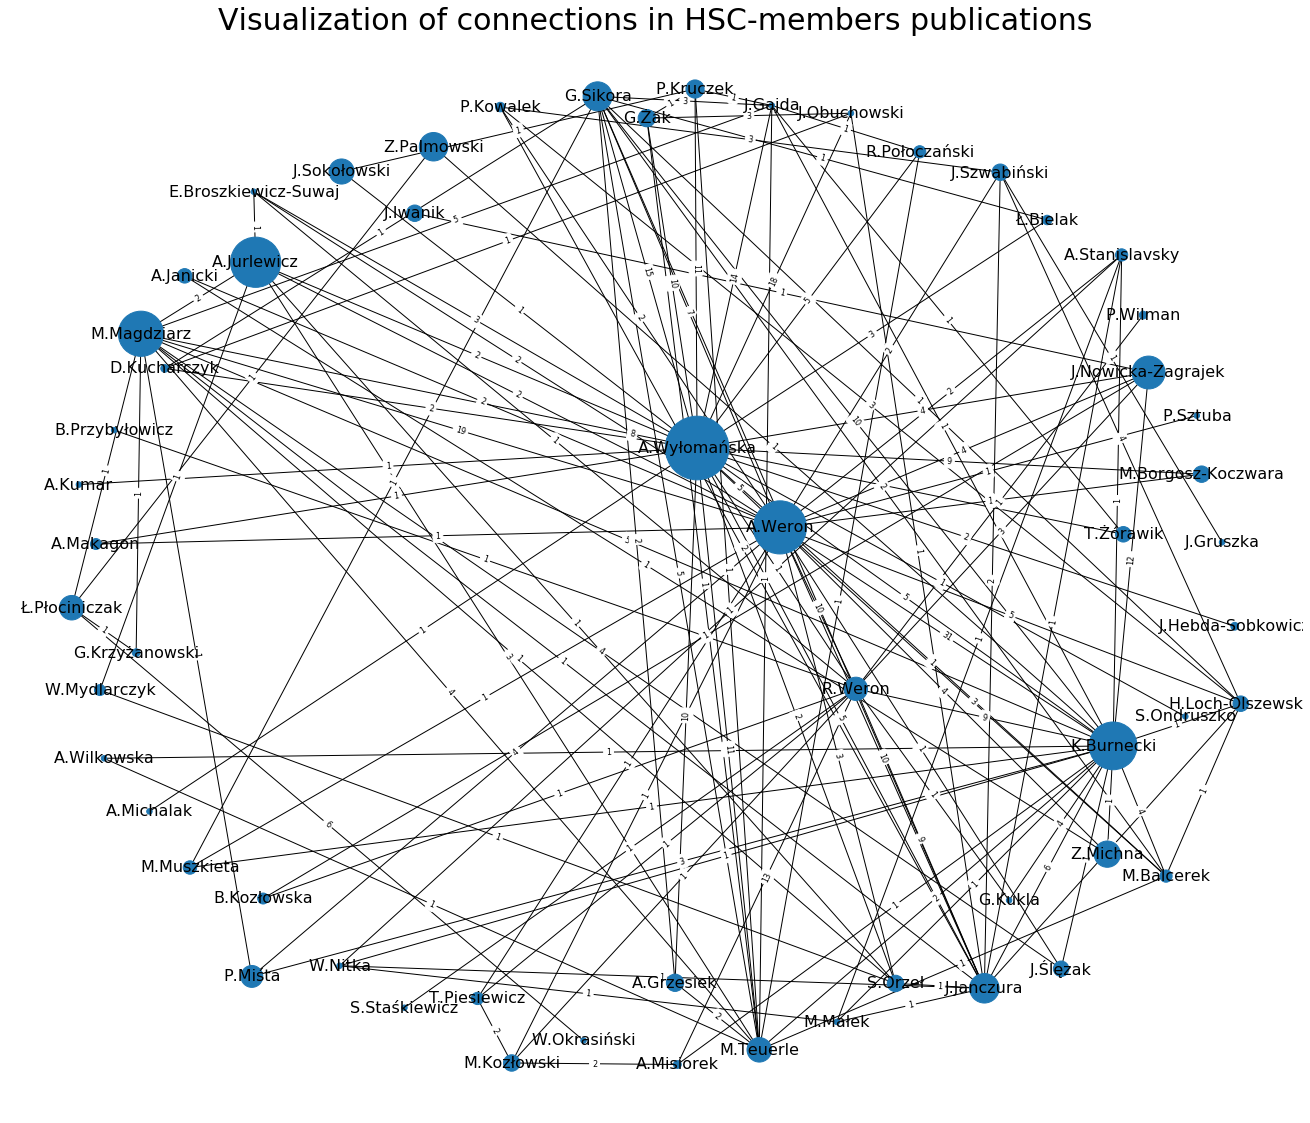

In [124]:
### Number of publications for each of members
Dictionary = {}
for i in range(len(Authors)):
    for j in range(len(Authors[i])):
        if Authors[i][j] in Dictionary:
            Dictionary[Authors[i][j]] = Dictionary[Authors[i][j]] + 1
        else:
            Dictionary[Authors[i][j]] = 1


### Connections in the Graph
Connections = nx.Graph()

for i in range(len(Authors)):
    for j in range(len(Authors[i])):
        for k in range(j+1,len(Authors[i])):
            if Connections.has_edge(Authors[i][j],Authors[i][k]):
                Connections[Authors[i][j]][Authors[i][k]]['weight'] = Connections[Authors[i][j]][Authors[i][k]]['weight'] + 1
            else:
                Connections.add_edge(Authors[i][j],Authors[i][k],weight = 1)


### Draw the Connections graph
fig=plt.gcf()
fig.set_size_inches(18,15)

## create size list depends on number of papers
Size = []
for i in Dictionary:
    Size.append(Dictionary[i]*30)

## plot graph
pos = nx.spring_layout(Connections,k =4)
nx.draw(Connections, pos, node_size = Size, with_labels = True, font_size=16, edge_color='black')
weights = nx.get_edge_attributes(Connections,'weight')
nx.draw_networkx_edge_labels(Connections, pos, edge_labels = weights, font_size = 8)
plt.title('Visualization of connections in HSC-members publications', fontdict = {'fontsize' : 30})
plt.show()
